# Finance & Analytics Club

## ADX (Average Directional Index)

It is a way of measuring strength of a trend.

ADX is non directional meaning it makes no inference about the direction of the trend but only about the strength of the trend.

The calculation involves finding both positive and negative directional movement (by comparing successive highs and lows) and then calculating the smoothed average of the difference of these.

More at: https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(364),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,197.384323
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,195.585770
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,199.172989
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,200.339050
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237
...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999


### Function to calculate True Range and Average True Range

In [3]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [4]:
df2 = ATR(ohlcv, 14)
df2 = df2.dropna()
df2

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2019-07-18,205.880005,203.699997,204.000000,205.660004,18582200.0,203.234497,4.928268,4.215771
2019-07-19,206.500000,202.360001,205.789993,202.589996,20929300.0,200.200699,4.139999,4.336486
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,7.029297,4.202562
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,4.133896,4.215196
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015,2.773010,4.120343
...,...,...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,11.410004,9.110001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,9.739990,9.483571
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999,13.510010,10.169998


### Function to calculate Average Direction Index

#### I would strongly urge you to go through any youtube video on ADX calculation through excel to get a clear indication about what we are about to do on the following code.

In [5]:
def ADX(DF,n):
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus']) # Directional Movement Up
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus']) # Directional Movement Down
    TRn = []                 # To smooth the True Range
    DMplusN = []             # To smooth upward Directional Movement
    DMminusN = []            # To smooth downward Directional Movement
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2

In [6]:
df2 = ADX(df2, 14)
df2 = df2.dropna()
df2

,High,Low,Open,Close,Volume,Adj Close,TR,ATR,DMplus,DMminus,TRn,DMplusN,DMminusN,DIplusN,DIminusN,DIdiff,DIsum,DX,ADX
Date,,,,,,,,,,,,,,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.830002,6.179031,6.279446,0.000000,0.000000,88.836531,19.043277,19.889461,21.436313,22.388831,0.952518,43.825145,2.173451,15.390756
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.518738,5.020004,6.228019,0.000000,1.529999,87.511068,17.683043,19.998784,20.206636,22.852862,2.646226,43.059498,6.145511,14.730381
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.877731,3.201263,5.968292,0.000000,0.209991,84.461541,16.419969,18.780291,19.440764,22.235316,2.794553,41.676080,6.705412,14.157169
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,207.329742,5.442276,6.109169,3.600006,0.000000,83.870850,18.847120,17.438842,22.471597,20.792494,1.679103,43.264092,3.881055,13.423161
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,207.061920,3.250000,6.134168,1.129990,0.000000,81.130075,18.630887,16.193210,22.964217,19.959565,3.004652,42.923782,6.999971,12.964362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,11.410004,9.110001,0.000000,4.070007,122.665935,37.382376,20.066519,30.474945,16.358673,14.116271,46.833618,30.141322,41.080730
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,9.739990,9.483571,2.899994,0.000000,123.644073,37.612200,18.633196,30.419735,15.070028,15.349707,45.489764,33.743212,40.556622
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999,13.510010,10.169998,12.920013,0.000000,128.322363,47.845628,17.302254,37.285494,13.483428,23.802066,50.768923,46.883142,41.008516


/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


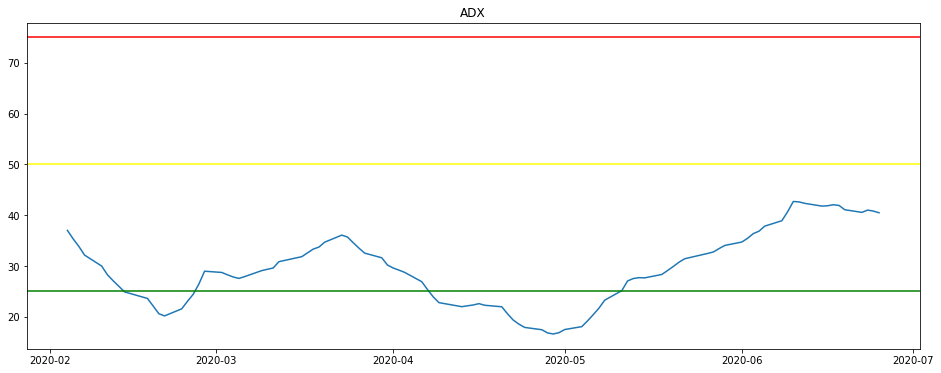

In [7]:
plt.figure(figsize = (16,6))
plt.plot(df2.iloc[-100:,-1])
plt.title('ADX')
plt.axhline(y=75, color = 'red')
plt.axhline(y=50, color = 'yellow')
plt.axhline(y=25, color = 'green')
plt.show()

#### ADX of 75-100 shows Extremely Strong Trend

#### ADX of 50-75 shows Very Strong Trend

#### ADX of 25-50 shows Strong Trend

#### ADX of 0-25 shows Weak Trend